# Estudo sobre retenção de funcionários
## Analisando quais funcionários podem sair da empresa e o porquê

## 1. Carregando o banco de dados de funcionários do RH

In [1]:
import pandas as pd

dados_rh = "https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/hr_data.csv"

df_rh = pd.read_csv(dados_rh)
#df.head()
df_rh.tail()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
14994,87670,2,151,3,0,1,0,support,low
14995,87673,2,160,3,0,1,0,support,low
14996,87679,2,143,3,0,1,0,support,low
14997,87681,6,280,4,0,1,0,support,low
14998,87684,2,158,3,0,1,0,support,low


In [2]:
df_rh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   employee_id            14999 non-null  int64 
 1   number_project         14999 non-null  int64 
 2   average_montly_hours   14999 non-null  int64 
 3   time_spend_company     14999 non-null  int64 
 4   Work_accident          14999 non-null  int64 
 5   left                   14999 non-null  int64 
 6   promotion_last_5years  14999 non-null  int64 
 7   department             14999 non-null  object
 8   salary                 14999 non-null  object
dtypes: int64(7), object(2)
memory usage: 1.0+ MB


Como é possível verificar, neste dataset temos os registros de 14.999 funcionários e, dentre as colunas que compõem este dataset, temos dados categóricos (ou seja, são variáveis que não têm uma escala de medida - são qualitativas) somente nas columas **department** e **salary**. Nesse caso, sabe-se que são categóricos devido ao fato de que estas colunas não possuem dados do tipo integer, e sim objects!

Uma maneira de descobrir quais são os valores únicos contidos nestas duas colunas de dados categóricos é utilizando a função <mark>df['column_name'].unique()</mark> 


In [3]:
print(df_rh['department'].unique())
print(df_rh['salary'].unique())

['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']
['low' 'medium' 'high']


## 2. Carregando os dados de Avaliação e Satisfação de funcionários

In [4]:
dados_avaliacao = "https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/employee_satisfaction_evaluation.xlsx"

aval_satif_func = pd.read_excel(dados_avaliacao)

aval_satif_func.head()

,EMPLOYEE #,satisfaction_level,last_evaluation
0,1003,0.38,0.53
1,1005,0.80,0.86
2,1486,0.11,0.88
3,1038,0.72,0.87
4,1057,0.37,0.52


In [5]:
aval_satif_func.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   EMPLOYEE #          14999 non-null  int64  
 1   satisfaction_level  14972 non-null  float64
 2   last_evaluation     14972 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 351.7 KB


Neste dataset possuímos os níveis de satisfação de cada um dos 14999 funcionários da empresa.
Para fazer a análise completa e correlacionar os níveis de satisfação com os outros dados do dataset do RH que carreguei anteriormente, será necessário **unir as duas tabelas**.

## 3. Fazendo merge entre as duas tabelas

Como o número de identificação do funcionário é o mesmo em ambos os datasets, de acordo com a [documentação oficial do Pandas](https://pandas.pydata.org/docs/user_guide/merging.html), é possível fazer um join entre as tabelas e efetivamente uniar as informações. 

In [6]:
main_df = df_rh.set_index('employee_id').join(aval_satif_func.set_index('EMPLOYEE #'))
main_df.head()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
employee_id,,,,,,,,,,
1003,2,157,3,0,1,0,sales,low,0.38,0.53
1005,5,262,6,0,1,0,sales,medium,0.80,0.86
1486,7,272,4,0,1,0,sales,medium,0.11,0.88
1038,5,223,5,0,1,0,sales,low,0.72,0.87
1057,2,159,3,0,1,0,sales,low,0.37,0.52


In [7]:
main_df = main_df.reset_index()
main_df.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,1003,2,157,3,0,1,0,sales,low,0.38,0.53
1,1005,5,262,6,0,1,0,sales,medium,0.80,0.86
2,1486,7,272,4,0,1,0,sales,medium,0.11,0.88
3,1038,5,223,5,0,1,0,sales,low,0.72,0.87
4,1057,2,159,3,0,1,0,sales,low,0.37,0.52


## 4. Tratamento dos valores nulos/faltantes

In [8]:
# Mostrando todas as linhas que possuem dados faltantes NaN
main_df[main_df.isnull().any(axis=1)]

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
18,3794,2,160,3,1,1,1,sales,low,NaN,NaN
19,1140,5,262,5,0,1,0,sales,low,NaN,0.89
33,1230,2,140,3,0,1,0,hr,low,NaN,NaN
53,1340,2,132,3,0,1,0,support,low,NaN,NaN
72,22316,2,149,3,0,1,0,product_mng,high,NaN,NaN
92,1581,2,143,3,0,1,0,sales,low,NaN,NaN
107,17376,2,148,3,0,1,0,accounting,medium,NaN,NaN
120,1739,4,158,4,1,1,0,technical,low,NaN,NaN
137,1847,2,129,3,0,1,0,management,low,NaN,NaN
175,32923,4,164,2,0,1,0,sales,low,NaN,NaN


É possível observar que, por algum motivo, temos algumas linhas que não possuem os valores de nível de satisfação dos funcionários.

Neste caso, para não influenciar na análise, podemos ou excluir estas linhas com valores faltantes ou substituí-los pela média global do dataset. Em um caso real, essa decisão deve ser muito bem discutida para avaliar qual a melhor alternativa que não influenciará nos resultados da análise, porém, como este é um estudo, irei optar em utilizar a média das avaliações de satisfação e substituí-los.

In [9]:
main_df.loc[main_df['employee_id'] == 20215]

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
11575,20215,3,192,7,0,0,0,management,high,NaN,NaN


In [10]:
main_df.describe()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14972.000000,14972.000000
mean,45424.627575,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,0.612830,0.716125
std,25915.900127,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,0.248714,0.171138
min,1003.000000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.090000,0.360000
25%,22872.500000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,0.440000,0.560000
50%,45448.000000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,0.640000,0.720000
75%,67480.500000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,0.820000,0.870000
max,99815.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
main_df.fillna(main_df.mean(), inplace=True)
main_df.head()

/tmp/ipykernel_26101/2431407480.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  main_df.fillna(main_df.mean(), inplace=True)


,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,1003,2,157,3,0,1,0,sales,low,0.38,0.53
1,1005,5,262,6,0,1,0,sales,medium,0.80,0.86
2,1486,7,272,4,0,1,0,sales,medium,0.11,0.88
3,1038,5,223,5,0,1,0,sales,low,0.72,0.87
4,1057,2,159,3,0,1,0,sales,low,0.37,0.52


In [12]:
# verificando se os valores foram corretamente substituídos
main_df.loc[main_df["employee_id"] == 20215]

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
11575,20215,3,192,7,0,0,0,management,high,0.61283,0.716125


## 5. Criando uma Matriz de correlação

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


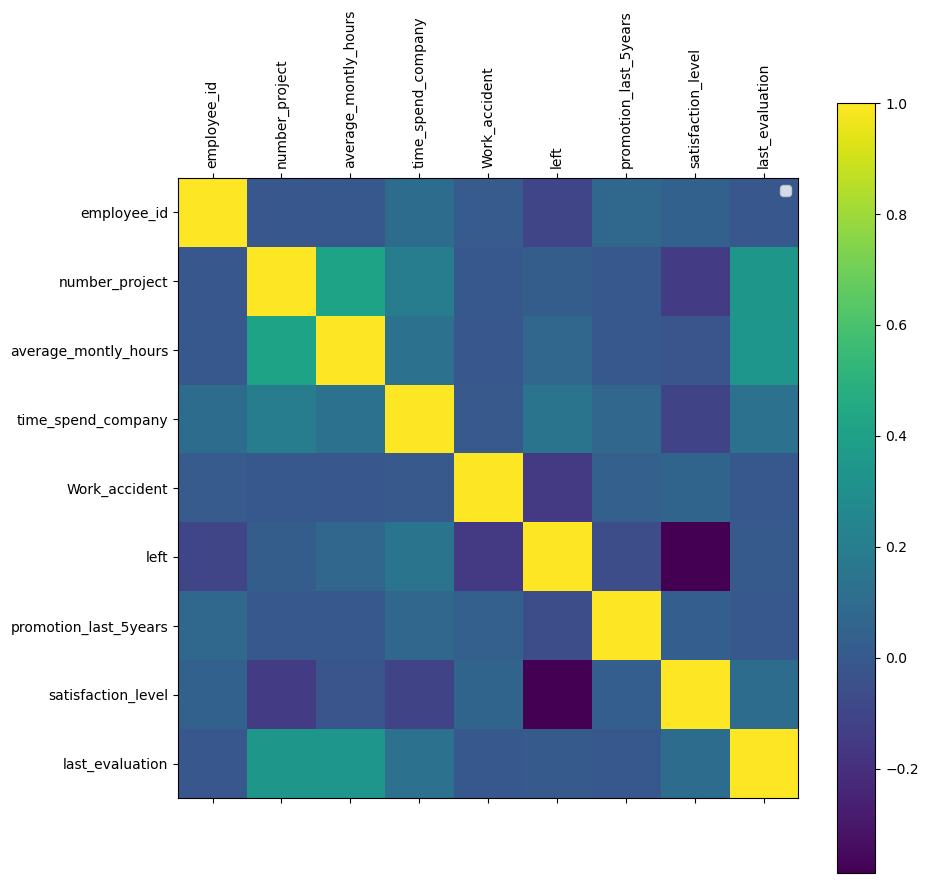

In [13]:
import matplotlib.pyplot as plt

def plot_corr(df,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.legend()
    cax = ax.matshow(corr)
    fig.colorbar(cax)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical');
    plt.yticks(range(len(corr.columns)), corr.columns);
    
plot_corr(main_df)

Analizando a matriz, pode-se concluir que, quanto mais próximo a zero (quadrado com cor escura), mais propenso o funcionário estará de sair da empresa. Ou seja, primeiramente quanto menor o nível de satisfação, maior a possibilidade do funcionário sair. Da mesma forma, funcionários que tiveram acidantes de trabalho também estão propensos a sair da empresa.

Além disso, quanto maior o tempo gasto na empresa (time_spend_company), menor é a possibilidade do funcionário sair!

Outra informação importante a se observar é que, em geral, o employee_id não influencia em nada na tomada de decisão do funcionário em sair da empresa ou não. Sendo assim, irei retirar essa coluna para que o modelo de Machine Learning não o considere.

In [14]:
main_df = main_df.drop(columns='employee_id')
main_df.head()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,2,157,3,0,1,0,sales,low,0.38,0.53
1,5,262,6,0,1,0,sales,medium,0.80,0.86
2,7,272,4,0,1,0,sales,medium,0.11,0.88
3,5,223,5,0,1,0,sales,low,0.72,0.87
4,2,159,3,0,1,0,sales,low,0.37,0.52


## 6. Preparação dos dataset para o modelo de ML

In [15]:
# Fazendo Hot Encoding nos dados categóricos
categoricos = ['department', 'salary']
main_df = pd.get_dummies(main_df, columns=categoricos, drop_first=True)
main_df.head()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,2,157,3,0,1,0,0.38,0.53,0,0,0,0,0,0,1,0,0,1,0
1,5,262,6,0,1,0,0.80,0.86,0,0,0,0,0,0,1,0,0,0,1
2,7,272,4,0,1,0,0.11,0.88,0,0,0,0,0,0,1,0,0,0,1
3,5,223,5,0,1,0,0.72,0.87,0,0,0,0,0,0,1,0,0,1,0
4,2,159,3,0,1,0,0.37,0.52,0,0,0,0,0,0,1,0,0,1,0


In [16]:
from sklearn.model_selection import train_test_split

#removendo os labels do 'training data'
X = main_df.drop(['left'], axis=1).values

#então atribuímos esses labels no dataset y
y = main_df['left'].values

In [17]:
# Dividindo os datasets de train/test na proporção 70%/30% 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [18]:
# Normalização dos dados
# A normalização é uma técnica frequentemente aplicada como parte da preparação de dados para Machine Learning.
# O objetivo da normalização é alterar os valores das colunas numéricas no conjunto de dados para usar uma escala 
#comum, sem distorcer diferenças nas faixas de valores ou perder informações.

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [19]:
df_train = pd.DataFrame(X_train)
df_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.159265,-0.307629,2.402185,-0.414917,7.086228,-0.538379,0.716497,-0.234217,-0.233991,-0.230116,4.775694,-0.24663,-0.250089,-0.619675,-0.410491,-0.472927,-0.968585,1.148563
1,-1.468894,-0.869264,-0.335458,-0.414917,-0.141119,-0.901097,-1.034703,-0.234217,-0.233991,-0.230116,-0.209394,-0.24663,-0.250089,-0.619675,2.436106,-0.472927,1.032433,-0.870653
2,-0.654815,0.996166,-1.019869,-0.414917,-0.141119,0.952798,-0.684463,-0.234217,-0.233991,-0.230116,-0.209394,-0.24663,-0.250089,1.613750,-0.410491,-0.472927,1.032433,-0.870653
3,-1.468894,-1.471016,-0.335458,-0.414917,-0.141119,-0.820493,-1.501690,-0.234217,4.273666,-0.230116,-0.209394,-0.24663,-0.250089,-0.619675,-0.410491,-0.472927,1.032433,-0.870653
4,0.159265,-0.889323,-1.019869,-0.414917,-0.141119,0.509475,1.300230,-0.234217,-0.233991,-0.230116,-0.209394,-0.24663,-0.250089,1.613750,-0.410491,-0.472927,-0.968585,1.148563


## 7. Treinando o Modelo de Regressão Logística

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)

predictions = model.predict(X_test)

print("Accuracy {0:.2f}%".format(100*accuracy_score(predictions, y_test)))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

Accuracy 78.24%
[[3161  215]
 [ 764  360]]
              precision    recall  f1-score   support

           0       0.81      0.94      0.87      3376
           1       0.63      0.32      0.42      1124

    accuracy                           0.78      4500
   macro avg       0.72      0.63      0.64      4500
weighted avg       0.76      0.78      0.76      4500



Utilizando este modelo de regressão logística, foi obtido uma acurácia de **79.47%**. Este modelo conseguiu uma precisão de 83% para casos em que o funcionário realmente saiu da empresa, mas conseguiu uma precisão de apenas 61% para funcionários que não sairiam da empresa.


## 8. Treinando com o Random Forest Classifier

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

model = RandomForestClassifier()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

print("Accuracy {0:.2f}%".format(100*accuracy_score(predictions, y_test)))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

Accuracy 98.93%
[[3369    7]
 [  41 1083]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3376
           1       0.99      0.96      0.98      1124

    accuracy                           0.99      4500
   macro avg       0.99      0.98      0.99      4500
weighted avg       0.99      0.99      0.99      4500



In [38]:
df_rh.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,1003,2,157,3,0,1,0,sales,low
1,1005,5,262,6,0,1,0,sales,medium
2,1486,7,272,4,0,1,0,sales,medium
3,1038,5,223,5,0,1,0,sales,low
4,1057,2,159,3,0,1,0,sales,low


In [39]:
main_df.drop(['left'], axis=1).columns

Index(['number_project', 'average_montly_hours', 'time_spend_company',
       'Work_accident', 'promotion_last_5years', 'satisfaction_level',
       'last_evaluation', 'department_RandD', 'department_accounting',
       'department_hr', 'department_management', 'department_marketing',
       'department_product_mng', 'department_sales', 'department_support',
       'department_technical', 'salary_low', 'salary_medium'],
      dtype='object')

In [43]:
feature_importances = pd.DataFrame(model.feature_importances_,
                                  index = pd.DataFrame(X_train).columns,
                                  columns = ['importance']).sort_values('importance', ascending=False)

feature_importances

,importance
5,0.305065
0,0.189385
2,0.172804
1,0.157984
6,0.129232
3,0.010577
16,0.009299
15,0.003880
17,0.003866
13,0.003638


Usando o classificador Random Forest, obtivemos uma acurácia excelente!!

Além disso, analisando as "feature_importances", constamos que a feature que mais impacta na saída dos funcionários é a **5 - satisfaction_level**, seguido da feature **0 - number project** e da feature **2 - time spend_company**. 

Mesmo assim, tentarei utilizar uma rede neural de Deep Learning para verificar se, para esse caso, conseguirei um resultado ainda melhor.

In [22]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(9, kernel_initializer = "uniform", activation = "relu", input_dim = 18))
model.add(Dense(1, kernel_initializer = "uniform", activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

2023-01-22 15:54:47.731723: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-22 15:54:47.873349: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-22 15:54:47.873366: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-01-22 15:54:48.631793: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [23]:
#verificando os parâmetros
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 9)                 171       
                                                                 
 dense_1 (Dense)             (None, 1)                 10        
                                                                 
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


In [24]:
#especificando as métricas do treinamento
batch_size = 10
epochs = 10

history = model.fit(X_train, y_train, batch_size = batch_size, epochs = epochs, verbose = 1, validation_data = (X_test, y_test))

score = model.evaluate(X_test, y_test, verbose = 0)
print('Test loss: ', score[0])
print('Test accuracy: ', score[1])

Epoch 1/10
1050/1050 [==============================] - 3s 2ms/step - loss: 0.4276 - accuracy: 0.7966 - val_loss: 0.3282 - val_accuracy: 0.8111
Epoch 2/10
1050/1050 [==============================] - 2s 2ms/step - loss: 0.2773 - accuracy: 0.8450 - val_loss: 0.2585 - val_accuracy: 0.8444
Epoch 3/10
1050/1050 [==============================] - 2s 2ms/step - loss: 0.2311 - accuracy: 0.9151 - val_loss: 0.2247 - val_accuracy: 0.9367
Epoch 4/10
1050/1050 [==============================] - 2s 2ms/step - loss: 0.2075 - accuracy: 0.9461 - val_loss: 0.2062 - val_accuracy: 0.9478
Epoch 5/10
1050/1050 [==============================] - 2s 2ms/step - loss: 0.1936 - accuracy: 0.9512 - val_loss: 0.1934 - val_accuracy: 0.9527
Epoch 6/10
1050/1050 [==============================] - 2s 2ms/step - loss: 0.1841 - accuracy: 0.9543 - val_loss: 0.1854 - val_accuracy: 0.9540
Epoch 7/10
1050/1050 [==============================] - 2s 2ms/step - loss: 0.1776 - accuracy: 0.9536 - val_loss: 0.1805 - val_accuracy:

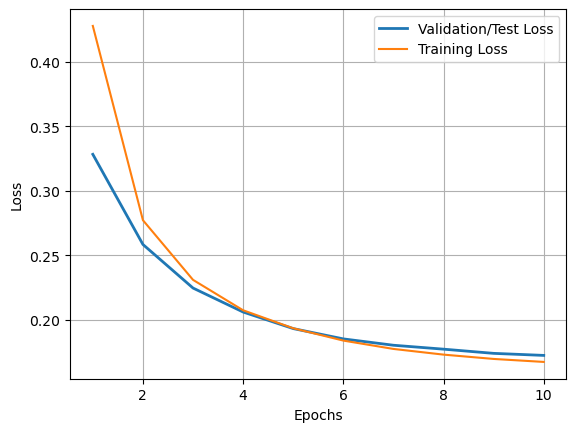

In [25]:
#Plotando os gráficos de Training Loss x Validation/Test Loss
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label = "Validation/Test Loss")
line2 = plt.plot(epochs, loss_values, label = "Training Loss")
plt.setp(line1, linewidth = 2.0)
plt.setp(line1, linewidth = 2.0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

In [26]:
prediction = model.predict(X_test)
predictions = (prediction > 0.5)

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

141/141 [==============================] - 0s 1ms/step
[[3296   80]
 [ 120 1004]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      3376
           1       0.93      0.89      0.91      1124

    accuracy                           0.96      4500
   macro avg       0.95      0.93      0.94      4500
weighted avg       0.96      0.96      0.96      4500



In [27]:
#Testando se, ao treinar com mais epochs, o resultado ficará muito melhor 
batch_size = 10
epochs = 100

history = model.fit(X_train, y_train, batch_size = batch_size, epochs = epochs, verbose = 1, validation_data = (X_test, y_test))

score = model.evaluate(X_test, y_test, verbose = 0)
print('Test loss: ', score[0])
print('Test accuracy: ', score[1])

Epoch 1/100
1050/1050 [==============================] - 2s 2ms/step - loss: 0.1656 - accuracy: 0.9546 - val_loss: 0.1696 - val_accuracy: 0.9558
Epoch 2/100
1050/1050 [==============================] - 2s 2ms/step - loss: 0.1643 - accuracy: 0.9550 - val_loss: 0.1675 - val_accuracy: 0.9553
Epoch 3/100
1050/1050 [==============================] - 2s 2ms/step - loss: 0.1634 - accuracy: 0.9537 - val_loss: 0.1691 - val_accuracy: 0.9556
Epoch 4/100
1050/1050 [==============================] - 2s 2ms/step - loss: 0.1621 - accuracy: 0.9542 - val_loss: 0.1672 - val_accuracy: 0.9542
Epoch 5/100
1050/1050 [==============================] - 2s 2ms/step - loss: 0.1612 - accuracy: 0.9547 - val_loss: 0.1664 - val_accuracy: 0.9549
Epoch 6/100
1050/1050 [==============================] - 2s 2ms/step - loss: 0.1601 - accuracy: 0.9548 - val_loss: 0.1653 - val_accuracy: 0.9542
Epoch 7/100
1050/1050 [==============================] - 2s 2ms/step - loss: 0.1593 - accuracy: 0.9539 - val_loss: 0.1646 - val_ac

1050/1050 [==============================] - 2s 2ms/step - loss: 0.1502 - accuracy: 0.9566 - val_loss: 0.1582 - val_accuracy: 0.9576
Epoch 58/100
1050/1050 [==============================] - 2s 2ms/step - loss: 0.1500 - accuracy: 0.9563 - val_loss: 0.1594 - val_accuracy: 0.9558
Epoch 59/100
1050/1050 [==============================] - 2s 2ms/step - loss: 0.1499 - accuracy: 0.9565 - val_loss: 0.1591 - val_accuracy: 0.9560
Epoch 60/100
1050/1050 [==============================] - 2s 2ms/step - loss: 0.1498 - accuracy: 0.9565 - val_loss: 0.1598 - val_accuracy: 0.9573
Epoch 61/100
1050/1050 [==============================] - 2s 2ms/step - loss: 0.1496 - accuracy: 0.9570 - val_loss: 0.1595 - val_accuracy: 0.9544
Epoch 62/100
1050/1050 [==============================] - 2s 2ms/step - loss: 0.1493 - accuracy: 0.9559 - val_loss: 0.1602 - val_accuracy: 0.9571
Epoch 63/100
1050/1050 [==============================] - 3s 3ms/step - loss: 0.1497 - accuracy: 0.9561 - val_loss: 0.1590 - val_accuracy

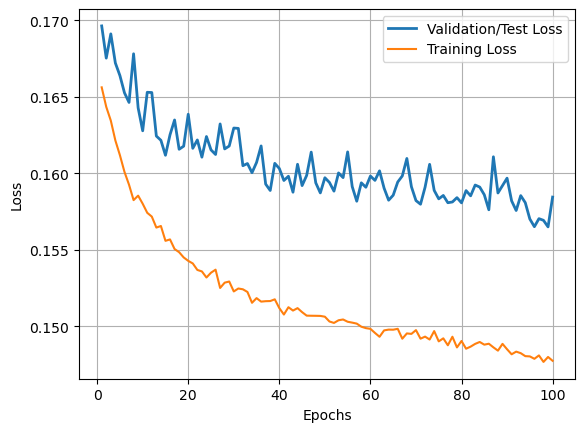

In [28]:
#Plotando os gráficos de Training Loss x Validation/Test Loss
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label = "Validation/Test Loss")
line2 = plt.plot(epochs, loss_values, label = "Training Loss")
plt.setp(line1, linewidth = 2.0)
plt.setp(line1, linewidth = 2.0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

In [29]:
prediction = model.predict(X_test)
predictions = (prediction > 0.5)

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

141/141 [==============================] - 0s 2ms/step
[[3295   81]
 [ 116 1008]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      3376
           1       0.93      0.90      0.91      1124

    accuracy                           0.96      4500
   macro avg       0.95      0.94      0.94      4500
weighted avg       0.96      0.96      0.96      4500



## Tentando um modelo de Deep Learning um pouco mais complexo

In [30]:
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout

model2 = Sequential()

#Hiddel layer 1
model2.add(Dense(270, activation='relu', input_dim = 18, kernel_regularizer=l2(0.01)))
model2.add(Dropout(0.3, noise_shape=None, seed=None))

#Hidden layer 2
model2.add(Dense(180, activation='relu', input_dim = 18, kernel_regularizer=l2(0.01)))
model2.add(Dropout(0.3, noise_shape=None, seed=None))

#Hidden layer 3
model2.add(Dense(90, activation='relu', kernel_regularizer=l2(0.01)))
model2.add(Dropout(0.3, noise_shape=None, seed=None))

model2.add(Dense(1, activation='sigmoid'))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 270)               5130      
                                                                 
 dropout (Dropout)           (None, 270)               0         
                                                                 
 dense_3 (Dense)             (None, 180)               48780     
                                                                 
 dropout_1 (Dropout)         (None, 180)               0         
                                                                 
 dense_4 (Dense)             (None, 90)                16290     
                                                                 
 dropout_2 (Dropout)         (None, 90)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                

In [31]:
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [33]:
batch_size = 10
epochs = 25

history = model2.fit(X_train, y_train, batch_size = batch_size, epochs=epochs, verbose=1, 
                     validation_data = (X_test, y_test))
score =model.evaluate(X_test, y_test, verbose=0)
print('Test loss: ', score[0])
print('Test accuracy: ', score[1])

Epoch 1/25
1050/1050 [==============================] - 3s 3ms/step - loss: 0.2261 - accuracy: 0.9476 - val_loss: 0.2156 - val_accuracy: 0.9502
Epoch 2/25
1050/1050 [==============================] - 4s 3ms/step - loss: 0.2217 - accuracy: 0.9511 - val_loss: 0.2108 - val_accuracy: 0.9513
Epoch 3/25
1050/1050 [==============================] - 3s 3ms/step - loss: 0.2272 - accuracy: 0.9469 - val_loss: 0.2188 - val_accuracy: 0.9520
Epoch 4/25
1050/1050 [==============================] - 3s 3ms/step - loss: 0.2220 - accuracy: 0.9521 - val_loss: 0.2141 - val_accuracy: 0.9513
Epoch 5/25
1050/1050 [==============================] - 3s 3ms/step - loss: 0.2231 - accuracy: 0.9488 - val_loss: 0.2023 - val_accuracy: 0.9562
Epoch 6/25
1050/1050 [==============================] - 4s 4ms/step - loss: 0.2270 - accuracy: 0.9489 - val_loss: 0.2058 - val_accuracy: 0.9569
Epoch 7/25
1050/1050 [==============================] - 5s 5ms/step - loss: 0.2239 - accuracy: 0.9479 - val_loss: 0.2059 - val_accuracy:

In [34]:
prediction = model2.predict(X_test)
predictions = (prediction > 0.5)

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

141/141 [==============================] - 0s 1ms/step
[[3296   80]
 [ 106 1018]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      3376
           1       0.93      0.91      0.92      1124

    accuracy                           0.96      4500
   macro avg       0.95      0.94      0.94      4500
weighted avg       0.96      0.96      0.96      4500



O interessante a se notar é que, mesmo utilizando modelos de Deep Learning, a acurácia do modelo ainda ficou menor que a do Random Forest (que teoricamente é um modelo que para ser feito é computacionalmente mais barato e rápido!).